In [2]:
library(readr)
library(ggplot2)
library(igraph)
library(tidyverse)
library(scales)

In [6]:
listings <- read_csv('listingsa.csv')

Parsed with column specification:
cols(
  id = col_integer(),
  name = col_character(),
  host_id = col_integer(),
  host_name = col_character(),
  neighbourhood_group = col_character(),
  neighbourhood = col_character(),
  latitude = col_double(),
  longitude = col_double(),
  room_type = col_character(),
  price = col_integer(),
  minimum_nights = col_integer(),
  number_of_reviews = col_integer(),
  last_review = col_date(format = ""),
  reviews_per_month = col_double(),
  calculated_host_listings_count = col_integer(),
  availability_365 = col_integer()
)


In [7]:
head(listings)

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1475427,Cozy Twin for the NYC Win! [Gay/LGBT Friendly],7896605,Daveyjoe!,Queens,Sunnyside,40.74234,-73.92579,Private room,102,5,7,2017-01-31,1.12,1,0
14653286,Charming pre-war in Sunnyside!,47108895,Jillian,Queens,Sunnyside,40.73919,-73.92124,Private room,135,1,3,2016-10-26,0.42,1,364
15483662,Spacious Room for Two in Sunnyside near Manhattan,75458625,Lidia,Queens,Sunnyside,40.74795,-73.91744,Private room,88,3,0,NA,NA,3,179
11767644,2 BEDROOM Apartment - Walk to Train!,62634797,Demetra,Queens,Sunnyside,40.73949,-73.92820,Entire home/apt,108,6,21,2017-03-18,2.75,1,74
15043788,Private room in Sunny side 3,84607966,Nurcan,Queens,Sunnyside,40.73908,-73.92030,Private room,45,1,24,2017-03-26,3.65,3,331
14650584,Private room in Sunnyside Gardens,2964414,Josefina,Queens,Sunnyside,40.74615,-73.91704,Private room,98,1,1,2016-08-28,0.14,1,364


In [17]:
model <- lm(price ~ availability_365*room_type*neighbourhood_group*minimum_nights*number_of_reviews, data=listings)

In [18]:
listings$predicted <- fitted(model)
head(listings$predicted)
head(listings$price)

[1]  63.20958  75.60221  69.65139 125.51879  71.39346  75.91834

[1] 102 135  88 108  45  98

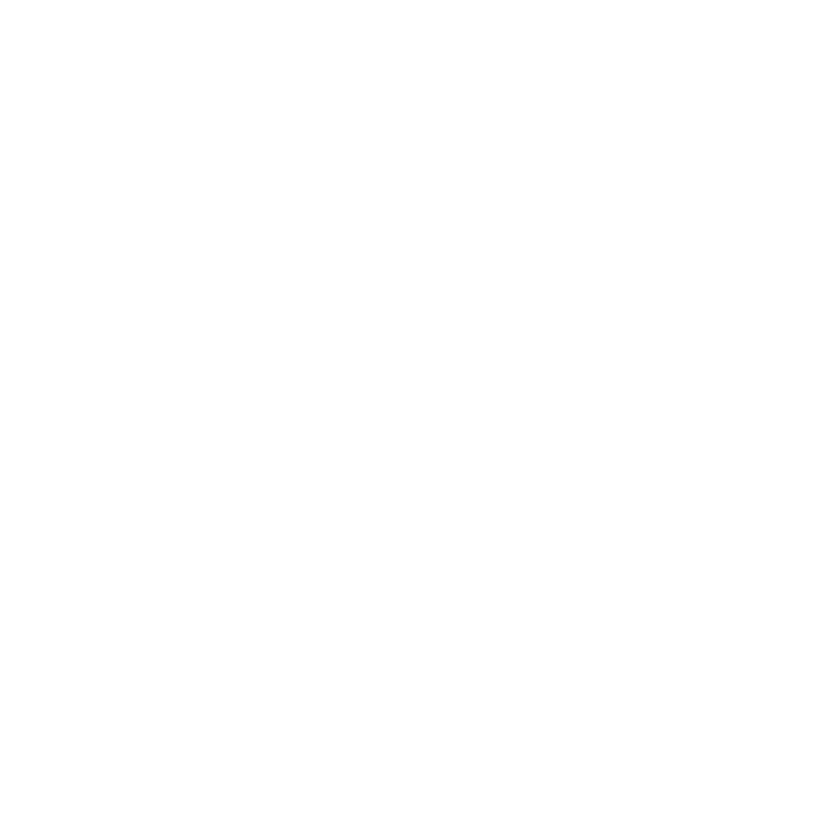

In [12]:
ggplot(listings, aes(x=availability_365, y=price, color=neighbourhood_group)) +
  geom_point(alpha=0.1) +
  geom_line(aes(x=availability_365, y=predicted, color=brand)) +
  xlab('Price') +
  ylab('Sales')